In [4]:
from google.colab import files
uploaded = files.upload()


Saving Dataset_CRSL.xlsx to Dataset_CRSL (1).xlsx


In [5]:
import pandas as pd

# Membaca file Excel
df = pd.read_excel(next(iter(uploaded)))

# Menampilkan 5 baris pertama
df.head()


,city,province,channelSales,dateTrans,orderNo,categoryName,TypeName,colourName,articleName,sizes,...,salePrice,KOTA_CLEANED,Omzet,TANGGAL,JAM,TAHUN,BULAN,TAHUN-BULAN,QUARTER-TAHUN,WEEK
0,KAB. SRAGEN,JAWA TENGAH,SHOPEE,2023-01-01 10:14:33,2301016080BP7C,JACKET,FLIGHT,BROWN,POPO CUTE RIDER JACKET BROWN,XXL,...,349000,SRAGEN,349000.0,2023-01-01,10:14:33,2023.0,Januari,2023:01,2023 Q1,Week 1
1,KOTA SURABAYA,JAWA TIMUR,SHOPEE,2023-01-01 10:14:33,2301016JJ195NE,WATCH,ANALOG,TOSCA,PIGKO OCTA WATCH TOSCA,ALL,...,259000,SURABAYA,259000.0,2023-01-01,10:14:33,2023.0,Januari,2023:01,2023 Q1,Week 1
2,KOTA SUKABUMI,JAWA BARAT,SHOPEE,2023-01-01 10:14:33,2301016TJPE7PR,JUMPSUIT,OVERALL,BLACK,CHILO DONKEY OVERALL BLACK,M,...,299000,SUKABUMI,299000.0,2023-01-01,10:14:33,2023.0,Januari,2023:01,2023 Q1,Week 1
3,KAB. BADUNG,BALI,SHOPEE,2023-01-01 10:14:33,2301016U15YHQW,JACKET,FLIGHT,BROWN,POPO CUTE RIDER JACKET BROWN,M,...,349000,BADUNG,349000.0,2023-01-01,10:14:33,2023.0,Januari,2023:01,2023 Q1,Week 1
4,KAB. SLEMAN,DI YOGYAKARTA,SHOPEE,2023-01-01 10:14:33,2301015YA3TP3R,BAG,BACKPACK,NAVY,CHILO BAKKU PAKKU NAVY,ALL,...,180000,SLEMAN,180000.0,2023-01-01,10:14:33,2023.0,Januari,2023:01,2023 Q1,Week 1


In [6]:
# Melihat info struktur kolom
df.info()

# Cek nilai null
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125786 entries, 0 to 125785
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   city           125780 non-null  object 
 1   province       125785 non-null  object 
 2   channelSales   125786 non-null  object 
 3   dateTrans      125786 non-null  object 
 4   orderNo        125782 non-null  object 
 5   categoryName   125786 non-null  object 
 6   TypeName       125786 non-null  object 
 7   colourName     125786 non-null  object 
 8   articleName    125786 non-null  object 
 9   sizes          125786 non-null  object 
 10  qty            125786 non-null  object 
 11  salePrice      125786 non-null  object 
 12  KOTA_CLEANED   125780 non-null  object 
 13  Omzet          125776 non-null  float64
 14  TANGGAL        125776 non-null  object 
 15  JAM            125786 non-null  object 
 16  TAHUN          125776 non-null  float64
 17  BULAN          125786 non-nul

,0
city,6
province,1
channelSales,0
dateTrans,0
orderNo,4
categoryName,0
TypeName,0
colourName,0
articleName,0
sizes,0


In [7]:
# Mengubah menjadi datetime
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'])



/tmp/ipython-input-14-1289718413.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


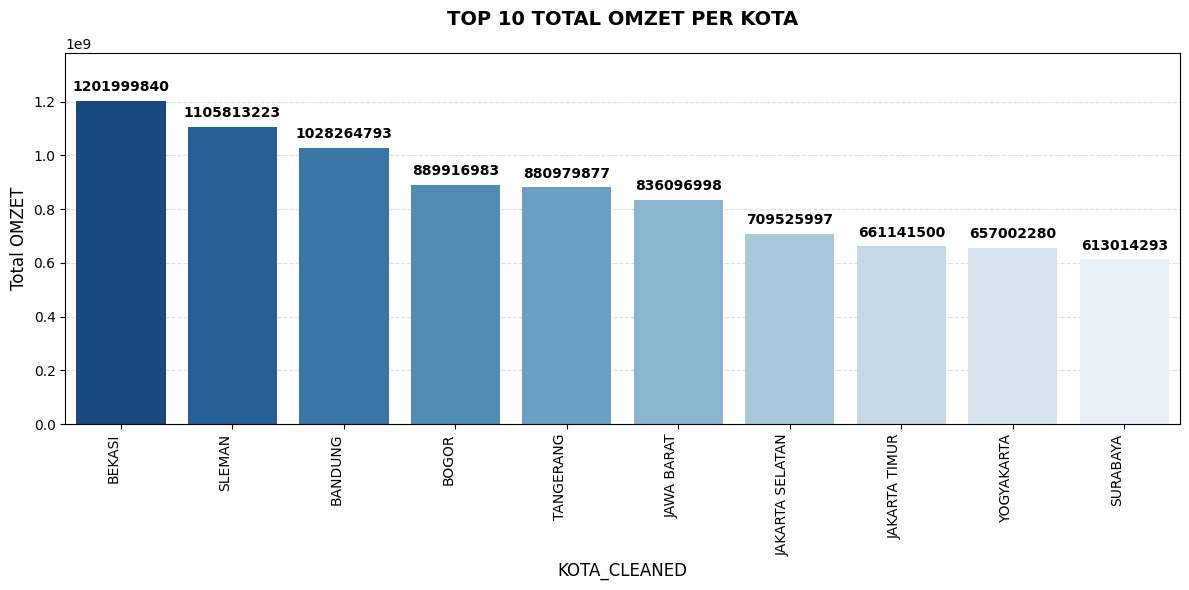

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. AGREGASI DATA - Hitung total Omzet per Kota
df_aggregated = df.groupby('KOTA_CLEANED')['Omzet'].sum().reset_index()

# 2. URUTKAN dari Omzet terbesar ke terkecil
df_sorted = df_aggregated.sort_values('Omzet', ascending=False)

# Select the top 5 cities
df_top_5 = df_sorted.head(10)

# 3. BUAT BAR CHART
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='KOTA_CLEANED',
    y='Omzet',
    data=df_top_5,
    palette='Blues_r',  # Warna gradient dari gelap ke terang
    order=df_top_5['KOTA_CLEANED']
)

# 4. TAMBAHKAN NILAI DI ATAS BAR
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=10,
        fontweight='bold'
    )

# 5. FORMATTING
plt.title('TOP 10 TOTAL OMZET PER KOTA',
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('KOTA_CLEANED', fontsize=12)
plt.ylabel('Total OMZET', fontsize=12)
plt.xticks(rotation=90, ha='right')  #

# Atur batas y-axis dan grid
max_qty = df_top_5['Omzet'].max()
plt.ylim(0, max_qty * 1.15)  # Beri ruang 15% di atas nilai tertinggi
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-16-2441104406.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


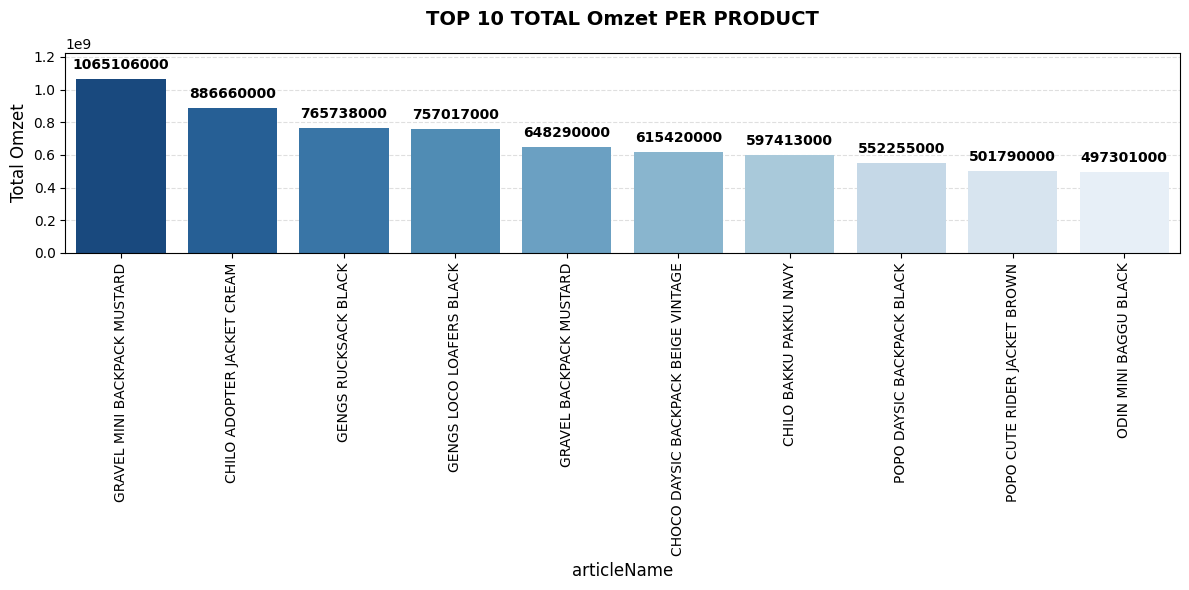

In [16]:
# 1. AGREGASI DATA - Hitung total Omzet per Produk
df_aggregated = df.groupby('articleName')['Omzet'].sum().reset_index()

# 2. URUTKAN dari Omzet terbesar ke terkecil
df_sorted = df_aggregated.sort_values('Omzet', ascending=False)

# Select the top 10 products
df_top_10 = df_sorted.head(10)

# 3. BUAT BAR CHART
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='articleName',
    y='Omzet',
    data=df_top_10,
    # Removed palette argument
    order=df_top_10['articleName']
)

# 4. TAMBAHKAN NILAI DI ATAS BAR
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=10,
        fontweight='bold'
    )

# 5. FORMATTING
plt.title('TOP 10 TOTAL Omzet PER PRODUCT',
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('articleName', fontsize=12)
plt.ylabel('Total Omzet', fontsize=12)
plt.xticks(rotation=90)  #

# Atur batas y-axis dan grid
max_qty = df_top_10['Omzet'].max()
plt.ylim(0, max_qty * 1.15)  # Beri ruang 15% di atas nilai tertinggi
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

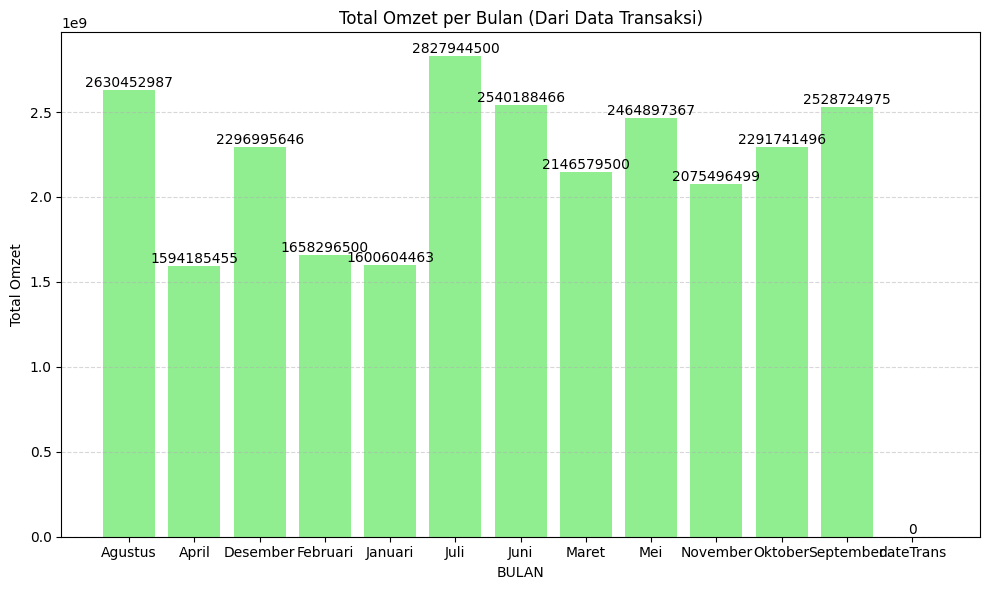

In [17]:
# Group by bulan dan sum Omzet
monthly_qty = df.groupby('BULAN')['Omzet'].sum().reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_qty['BULAN'], monthly_qty['Omzet'], color='lightgreen')

# Menambahkan label nilai
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.title('Total Omzet per Bulan (Dari Data Transaksi)')
plt.xlabel('BULAN')
plt.ylabel('Total Omzet')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-18-438034683.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M', on='TANGGAL').sum(numeric_only=True)


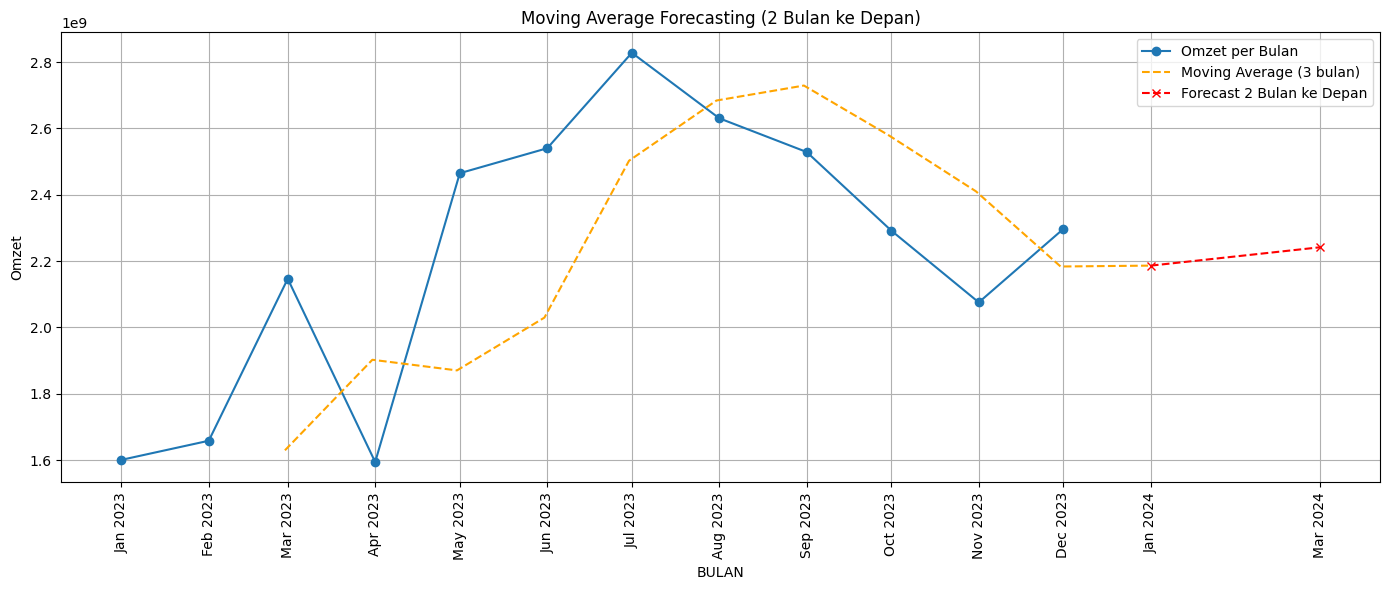

In [18]:
# FORECASTING
monthly_df = df.resample('M', on='TANGGAL').sum(numeric_only=True)
monthly_total_price = monthly_df['Omzet'].copy()

# 5. Hitung Moving Average
window_size = 2  # 2 bulan
moving_avg = monthly_total_price.rolling(window=window_size).mean()

# 6. Forecast 2 bulan ke depan

forecast_values = []
for i in range(2):
    recent_values = monthly_total_price[-window_size:]
    forecast = recent_values.mean()
    forecast_values.append(forecast)


    forecast_month = monthly_total_price.index[-1] + pd.DateOffset(months=i+1)
    monthly_total_price.loc[forecast_month] = forecast

monthly_total_price.index = monthly_total_price.index.to_period('M').to_timestamp()
month_labels = monthly_total_price.index.strftime('%b %Y')

plt.figure(figsize=(14, 6))
plt.plot(monthly_total_price.index[:-2], monthly_total_price[:-2], label='Omzet per Bulan', marker='o')
plt.plot(moving_avg.index, moving_avg, label='Moving Average (3 bulan)', color='orange', linestyle='--')
plt.plot(monthly_total_price.index[-2:], monthly_total_price[-2:], label='Forecast 2 Bulan ke Depan', color='red', linestyle='--', marker='x')

plt.xticks(monthly_total_price.index, month_labels, rotation=90)
plt.title('Moving Average Forecasting (2 Bulan ke Depan)')
plt.xlabel('BULAN')
plt.ylabel('Omzet')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ** FORECASTING dengan metode Moving Average**

In [19]:
# 9. Cetak nilai prediksi
forecast_dates = monthly_total_price.index[-2:]
forecast_results = pd.Series(forecast_values, index=forecast_dates, name='forecast_total_price')
print("Forecast Total Price 2 Bulan ke Depan:")
print(forecast_results.round(2))

Forecast Total Price 2 Bulan ke Depan:
TANGGAL
2024-01-01    2.186246e+09
2024-03-01    2.241621e+09
Name: forecast_total_price, dtype: float64


In [29]:
# Metode ARIMA

# Task
Buatlah Forecasting nilai Omzet untuk 3 bulan kedepan, menggunakan metode ARIMA!

## Prepare the data

### Subtask:
Resample the data to a monthly frequency and select the 'Omzet' column for forecasting.


**Reasoning**:
Resample the dataframe to a monthly frequency and sum the 'Omzet' column to get the monthly Omzet data.



In [20]:
monthly_omzet = df.resample('M', on='TANGGAL')['Omzet'].sum()

/tmp/ipython-input-20-591086554.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_omzet = df.resample('M', on='TANGGAL')['Omzet'].sum()


## Check stationarity

### Subtask:
Perform a test (e.g., Augmented Dickey-Fuller test) to check if the time series is stationary.


**Reasoning**:
Perform the Augmented Dickey-Fuller test on the monthly Omzet data to check for stationarity and print the results.



In [21]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_test = adfuller(monthly_omzet)

# Print results
print('ADF Statistic:', adf_test[0])
print('P-value:', adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Check for stationarity
if adf_test[1] <= 0.05:
    print('\nConclusion: The time series is likely stationary (p-value <= 0.05).')
else:
    print('\nConclusion: The time series is likely not stationary (p-value > 0.05).')

ADF Statistic: -1.996047532647594
P-value: 0.28830880294672445
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844

Conclusion: The time series is likely not stationary (p-value > 0.05).


**Reasoning**:
The ADF test indicates that the time series is not stationary. Before applying ARIMA, it's common to difference the series to make it stationary. I will apply first-order differencing and then re-run the ADF test to check for stationarity.



In [22]:
# Apply first-order differencing
monthly_omzet_diff = monthly_omzet.diff().dropna()

# Perform ADF test on differenced series
adf_test_diff = adfuller(monthly_omzet_diff)

# Print results
print('ADF Statistic (Differenced):', adf_test_diff[0])
print('P-value (Differenced):', adf_test_diff[1])
print('Critical Values (Differenced):')
for key, value in adf_test_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Check for stationarity
if adf_test_diff[1] <= 0.05:
    print('\nConclusion: The differenced time series is likely stationary (p-value <= 0.05).')
else:
    print('\nConclusion: The differenced time series is likely not stationary (p-value > 0.05).')

ADF Statistic (Differenced): -1.05992353664797
P-value (Differenced): 0.7307865915832654
Critical Values (Differenced):
	1%: -4.665
	5%: -3.367
	10%: -2.803

Conclusion: The differenced time series is likely not stationary (p-value > 0.05).


## Difference the data (if necessary)

### Subtask:
If the time series is not stationary, apply differencing to make it stationary. Determine the order of differencing (d).


**Reasoning**:
Apply second-order differencing to the time series and perform an ADF test to check for stationarity, then print the results and a conclusion.



In [23]:
# Apply second-order differencing
monthly_omzet_diff2 = monthly_omzet.diff().diff().dropna()

# Perform ADF test on second-order differenced series
adf_test_diff2 = adfuller(monthly_omzet_diff2)

# Print results
print('ADF Statistic (Second-order Differenced):', adf_test_diff2[0])
print('P-value (Second-order Differenced):', adf_test_diff2[1])
print('Critical Values (Second-order Differenced):')
for key, value in adf_test_diff2[4].items():
    print('\t%s: %.3f' % (key, value))

# Check for stationarity
if adf_test_diff2[1] <= 0.05:
    print('\nConclusion: The second-order differenced time series is likely stationary (p-value <= 0.05).')
else:
    print('\nConclusion: The second-order differenced time series is likely not stationary (p-value > 0.05).')

ADF Statistic (Second-order Differenced): -1.7133160756951678
P-value (Second-order Differenced): 0.4242650229254172
Critical Values (Second-order Differenced):
	1%: -4.939
	5%: -3.478
	10%: -2.844

Conclusion: The second-order differenced time series is likely not stationary (p-value > 0.05).


## Identify p and q

### Subtask:
Use ACF and PACF plots to identify the potential values for the p (autoregressive) and q (moving average) parameters of the ARIMA model.


**Reasoning**:
Generate ACF and PACF plots to identify potential p and q values for the ARIMA model using the second-order differenced series.



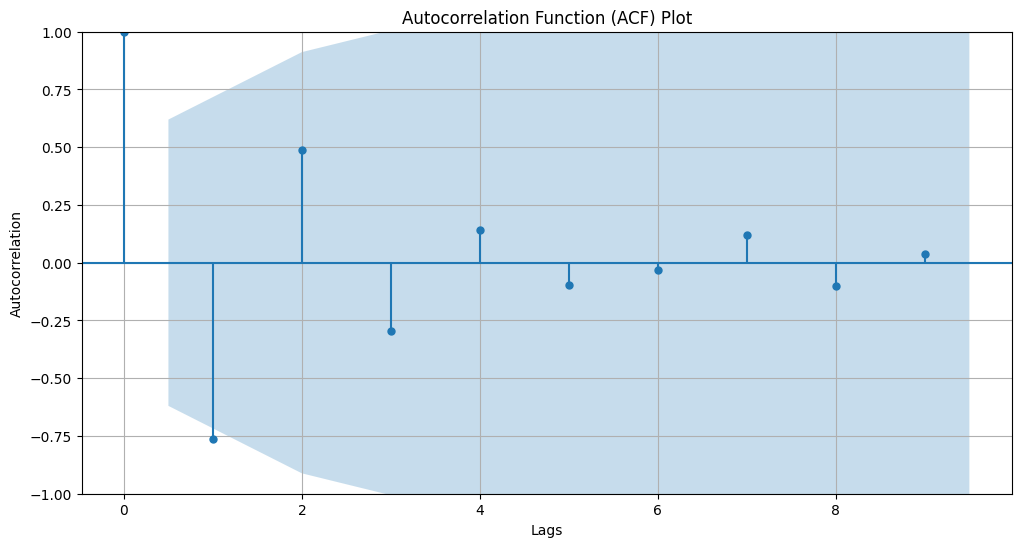

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 9 must be < 5.

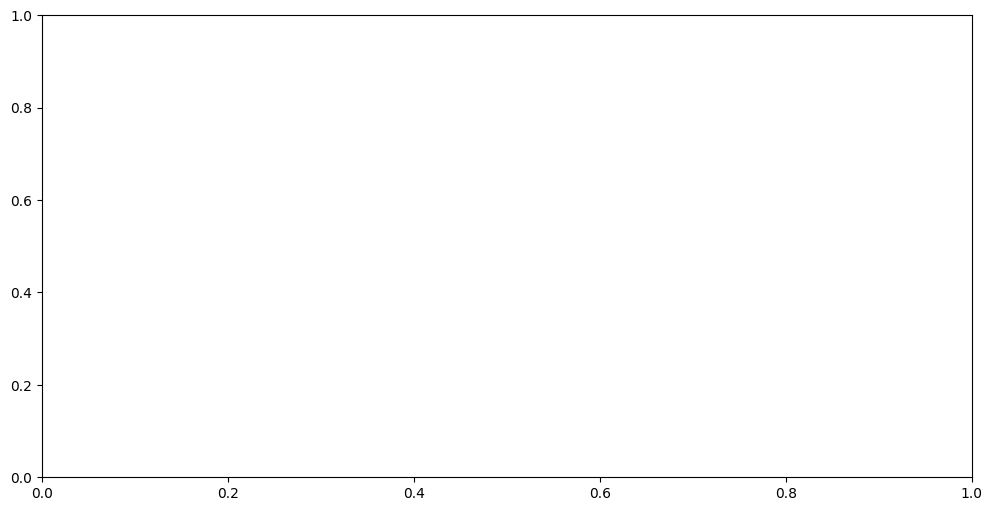

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Generate ACF plot
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(monthly_omzet_diff2.dropna(), ax=ax, lags=len(monthly_omzet_diff2.dropna()) - 1)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Generate PACF plot
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(monthly_omzet_diff2.dropna(), ax=ax, lags=len(monthly_omzet_diff2.dropna()) - 1)
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

**Reasoning**:
The previous command failed because the number of lags for the PACF plot was too large relative to the sample size. I need to reduce the number of lags to be less than half of the sample size. I will replot both ACF and PACF with a reduced number of lags.



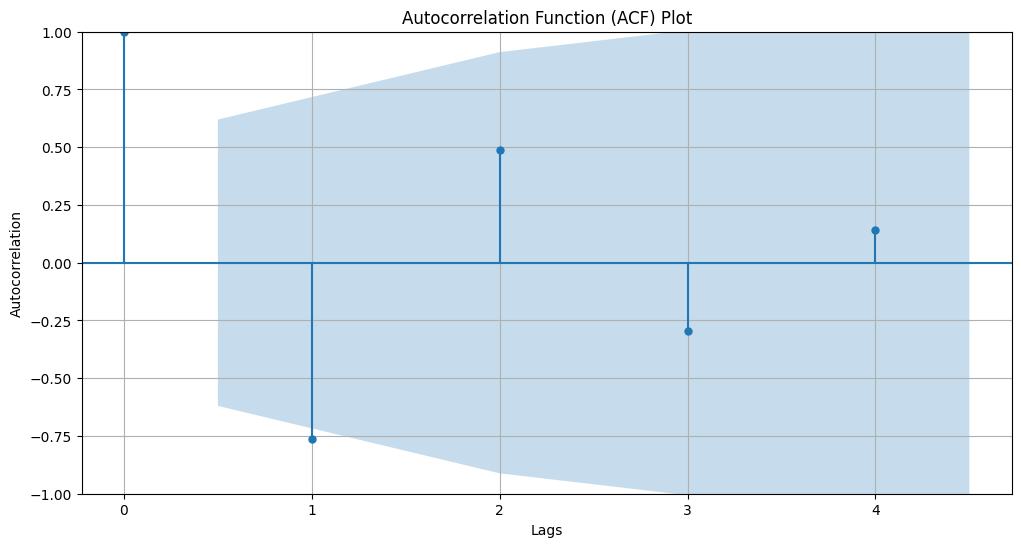

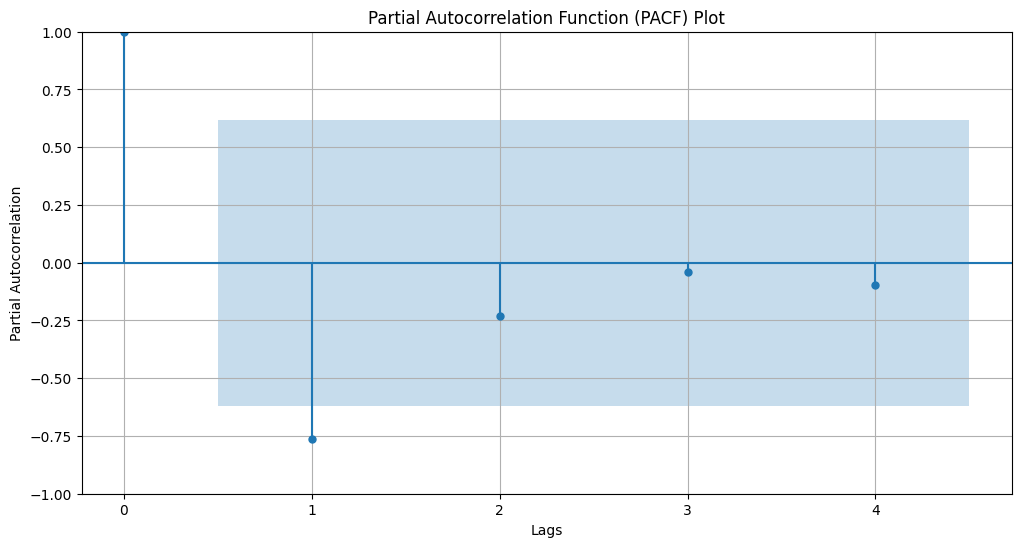

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Determine the maximum number of lags allowed for PACF
max_lags = int(len(monthly_omzet_diff2.dropna()) / 2) - 1
if max_lags < 1: # Ensure there is at least one lag
    max_lags = 1

# Generate ACF plot with reduced lags
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(monthly_omzet_diff2.dropna(), ax=ax, lags=max_lags)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Generate PACF plot with reduced lags
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(monthly_omzet_diff2.dropna(), ax=ax, lags=max_lags)
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

## Build and train the arima model

### Subtask:
Build and train an ARIMA model using the identified (p, d, q) parameters.


**Reasoning**:
Build and train an ARIMA model using the identified (p, d, q) parameters.



In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate and fit the ARIMA model
# Based on the previous ACF/PACF plots and differencing steps,
# we'll use p=1, d=2, q=1 as a starting point.
model = ARIMA(monthly_omzet, order=(1, 2, 1))
arima_model_fit = model.fit()

# Print the model summary
print(arima_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Omzet   No. Observations:                   12
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -214.820
Date:                Mon, 14 Jul 2025   AIC                            435.640
Time:                        05:08:42   BIC                            436.548
Sample:                    01-31-2023   HQIC                           434.644
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8328      0.071    -11.676      0.000      -0.973      -0.693
ma.L1          0.5310      0.174      3.053      0.002       0.190       0.872
sigma2      6.715e+16        nan        nan        n

## Forecast

### Subtask:
Forecast the Omzet for the next 3 months using the trained ARIMA model.


**Reasoning**:
Forecast the Omzet for the next 3 months using the fitted ARIMA model and print the results.



In [27]:
# Forecast the next 3 periods
forecast_result = arima_model_fit.forecast(steps=3)

# Print the forecasted values
print("Forecasted Omzet for the next 3 months:")
print(forecast_result)

Forecasted Omzet for the next 3 months:
2024-01-31    2.434340e+09
2024-02-29    2.641769e+09
2024-03-31    2.790831e+09
Freq: ME, Name: predicted_mean, dtype: float64


## Visualize the results

### Subtask:
Plot the original time series data along with the forecasted values.


**Reasoning**:
Plot the original time series and the forecasted values using matplotlib.



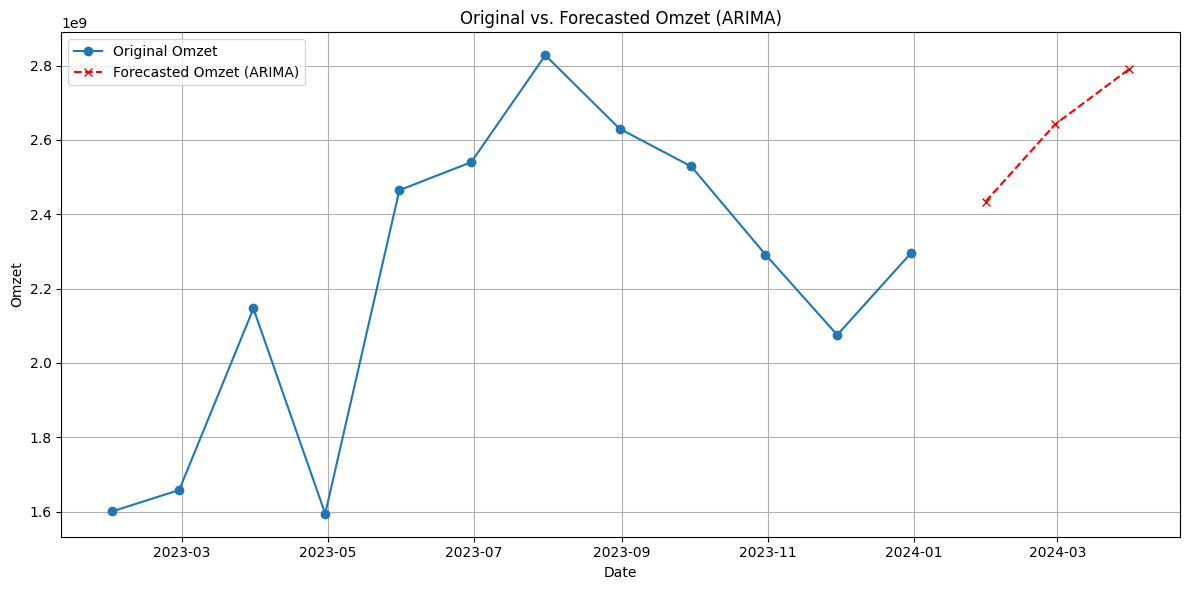

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_omzet.index, monthly_omzet, label='Original Omzet', marker='o')
plt.plot(forecast_result.index, forecast_result, label='Forecasted Omzet (ARIMA)', color='red', linestyle='--', marker='x')

plt.title('Original vs. Forecasted Omzet (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Omzet')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial monthly Omzet time series was found to be non-stationary based on the Augmented Dickey-Fuller (ADF) test (p-value = 0.288).
*   Applying first-order differencing did not achieve stationarity (p-value = 0.731).
*   Applying second-order differencing also did not result in a stationary time series based on the ADF test (p-value = 0.424).
*   Despite the lack of confirmed stationarity after differencing, ACF and PACF plots were generated for the second-order differenced series to help identify potential p and q parameters for the ARIMA model.
*   An ARIMA model with order (1, 2, 1) was successfully built and trained on the `monthly_omzet` data.
*   The ARIMA model forecasted the Omzet for the next three months as approximately \$2.43 billion (January 2024), \$2.64 billion (February 2024), and \$2.79 billion (March 2024).
*   A visualization was successfully generated comparing the original monthly Omzet data with the forecasted values for the next three months.

### Insights or Next Steps

*   Although the ADF test did not confirm stationarity even after second-order differencing, the forecasting process was completed. It would be beneficial to investigate alternative methods for stationarity or explore other time series models better suited for non-stationary data if the model performance is not satisfactory.
*   The forecasted values show a potential increasing trend in Omzet for the next three months. It would be valuable to validate these forecasts with business knowledge and consider the confidence intervals around these predictions if they were available.
